# Принятие решений в бизнесе

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Описание данных**

Данные для первой части:

Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл /datasets/orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Основые задачи:**
* Приоритизировать гипотезы;
* Запустить A/B-тест;
* Проанализировать результаты.

## Подготовка данных к анализу

Импортируем библиотеки и составим первое впечатление и данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('max_colwidth', None)
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(hypothesis)
display(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

В таблице `hypothesis` 5 столбцов. Тип данных в столбцах: object, int. Количество значений в столбцах одинаковое, значит пропуски отсутствуют. Есть нарушение стиля в столбцах.

Необходимо исправить нарушение стиля и проверить таблицу на наличие дубликатов.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.columns)
display(hypothesis.duplicated().sum())

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

0

Проделаем тоже самое с таблицами `orders` и `visitors`

In [4]:
display(orders.head())
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

В таблице `orders` 5 столбцов. Тип данных в столбцах: object, int. Количество значений в столбцах одинаковое, значит пропуски отсутствуют. 

Необходимо изменить тип данных в столбце date, исправить нарушение стиля и проверить таблицу на наличие дубликатов.

In [5]:
#изменим тип данных
orders['date'] = pd.to_datetime(orders['date']) 
#переименуем столбцы
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
#посмотрим наличие дубликатов
display(orders.duplicated().sum())
display(orders.columns)

0

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [6]:
display(visitors.head())
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В таблице `visitors` 3 столбцов. Тип данных в столбцах: object, int. Количество значений в столбцах одинаковое, значит пропуски отсутствуют. 

Необходимо изменить тип данных в столбце date и проверить таблицу на наличие дубликатов.

In [7]:
#изменим тип данных
visitors['date'] = pd.to_datetime(visitors['date']) 
#посмотрим наличие дубликатов
visitors.duplicated().sum() 

0

**Вывод**

Подготовили данные к дальнейшему анализу: убедились в отсутствии дубликатов и пропусков, поменяли необходимые типы данных.

## Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез

Оценим приоритет гипотез при помощи фреймворка ICE

In [8]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE 8, 0, 7.

### Фреймворк RICE для приоритезации гипотез

Оценим приоритет гипотез при помощи фреймворка RICE

In [9]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE 7, 2, 0 и 6.


### Вывод

При применении RICE вместо ICE на первом месте оказалась гипотеза под номером 7. Так произошло, потому что ее параметр `reach` равен 10, в то время как у других гипотез он меньше. А гипотеза под номером 8 не вошла в топ по RICE, потому что ее параметр `reach` равен 1.

На основании приоритезации гипотез при помощи фреймворков ICE и RICE можно отметить 7 и 0 гипотезы как важные.

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в таблицах orders и visitors. 

###  График кумулятивной выручки по группам

In [10]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

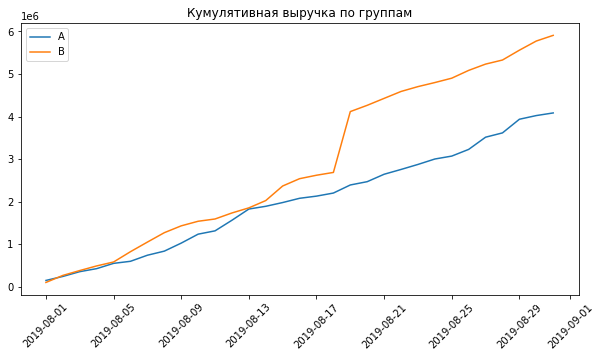

In [11]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)

# Строим график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend() 
plt.title('Кумулятивная выручка по группам');


Выручка группы А почти равномерно увеличивается в течении всего теста, в то время как в В есть резкий рост после 17 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

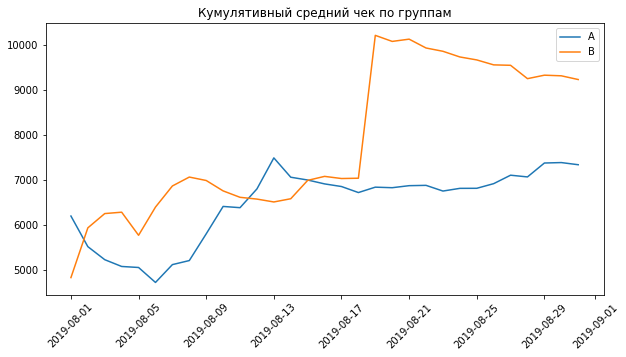

In [12]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам');

Средний чек тоже становится равномерным ближе к концу теста. Однако, мы видим резкий всплеск на графике группы В, что свидетельствует о крупной покупке, после чего средний чек в этой группе начинает снижаться.

### График относительного изменения кумулятивного среднего чека группы B к группе A

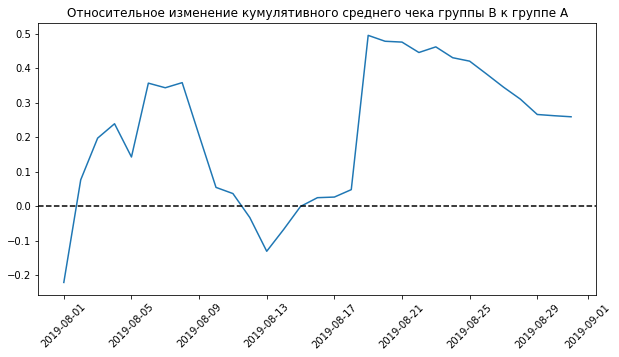

In [13]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');

В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы и выбросы. Найдём их позже.

### График кумулятивной конверсии по группам

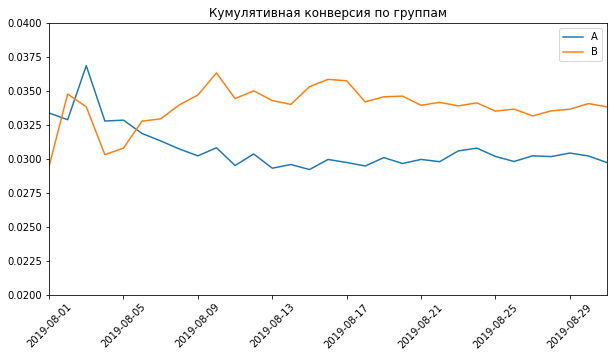

In [14]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(xmin=cumulative_data_A['date'].min(), xmax=cumulative_data_A['date'].max(), ymin=.020, ymax=0.04)
plt.title('Кумулятивная конверсия по группам');

На первых этапах конверсию в обеих группах колебалась, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

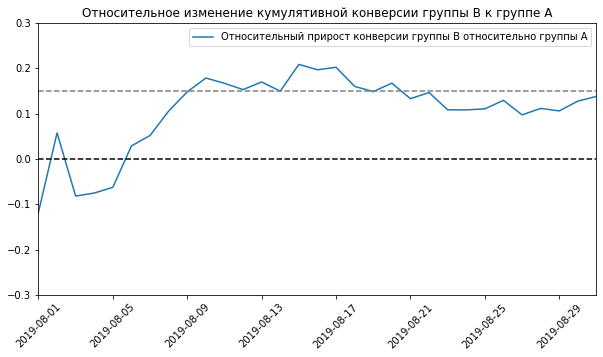

In [15]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(xmin=cumulative_data_A['date'].min(), xmax=cumulative_data_A['date'].max(), ymin=-0.30, ymax=0.3)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A');

В начале теста группа B проигрывала группе A, затем вырвалась вперёд.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

Оценим количество заказов

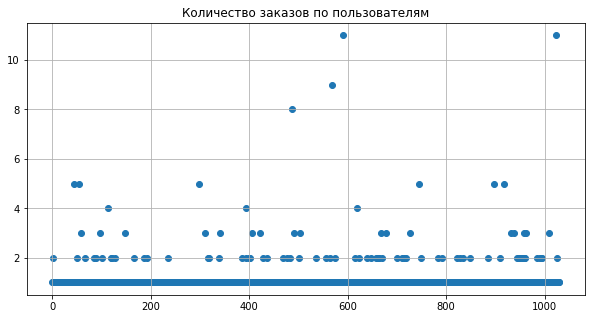

In [16]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)    
orders_by_users.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders']) 
plt.grid()
plt.title('Количество заказов по пользователям');

Пользователей, заказавших более двух раз мало. Они вполне могут быть аномальными. Одноко, чтобы удостовериться, посчитаем выборочные перцентили.

### Граница для определения аномальных пользователей

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [17]:
display(np.percentile(orders_by_users['orders'], [95, 99]))

array([2., 4.])

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей больше 4 заказов.

Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

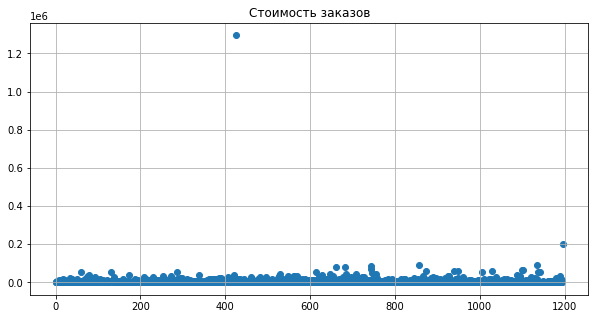

In [18]:
x1_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x1_values, orders['revenue']) 
plt.grid()
plt.title('Стоимость заказов');

Видим несколько аномально больших заказа в 200000 тыс и больше 1.2 млн рублей. Посмотрим на график детальнее.

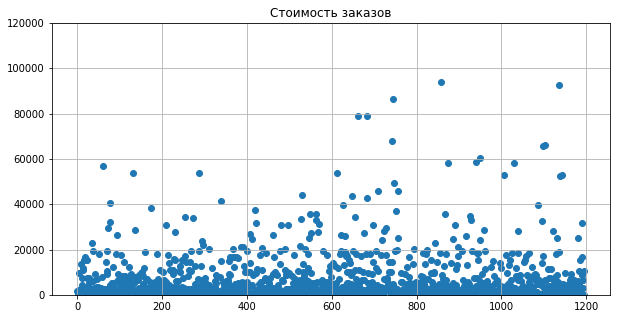

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(x1_values, orders['revenue']) 
plt.grid()
plt.ylim(0,120000)
plt.title('Стоимость заказов');

Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 30 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Поэтому посчитаем выборочные перцентили.

### Граница для определения аномальных заказов

In [20]:
display(np.percentile(orders['revenue'], [95, 99])) 

array([28000. , 58233.2])

Не более 5% заказов выше 28000 рублей и не более 1% больше 58233 рублей.

Можно выбрать 35000 или 40000 рублей за верхнюю границу суммы заказов. И отсеивать аномальных пользователей по ней.

### Вывод

На основании графиков можно сделать предположение, что группа В лидирует. Однако, в данных были обнаружены выбросы. Поэтому были определены границы для определения аномалий.

## Статистическая значимость

### Статистическая значимость по «сырым» данным

Таблицы с данными для заказов на каждого пользователя

In [21]:
orders_by_users_A = orders.query('group == "A"').groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_A.columns=['visitors_id','orders']
orders_by_users_B = orders.query('group == "B"').groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users_B.columns=['visitors_id','orders']

In [22]:
visitors_A = visitors.query('group == "A"')['visitors'].sum()
visitors_B = visitors.query('group == "B"')['visitors'].sum()

Создадим переменные с пользователями, которые ничего не заказали, вместо них будут 0

In [23]:
without_orders_A = pd.Series(0, index=np.arange(visitors_A - len(orders_by_users_A)), name='orders')
without_orders_B = pd.Series(0, index=np.arange(visitors_B - len(orders_by_users_B)), name='orders')

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [24]:
sample_A = pd.concat([orders_by_users_A['orders'], without_orders_A], axis=0)
sample_B = pd.concat([orders_by_users_B['orders'], without_orders_B], axis=0)

#### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Применим критерий Манна-Уитни к сырым данным и посмотрим на значение средний конверсий

Сформулируем нулевую и альтернативную гипотезы:
* H0: конверсия группы А и конверсии группы В равны
* H1: конверсии групп не равны.

In [25]:
#alpha = .05
display('p_value: {:.5f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))
display('Средняя конверсия группы А: {:.1%}'.format(sample_A.mean()))
display('Средняя конверсия группы B: {:.1%}'.format(sample_B.mean()))

'p_value: 0.01679'

'Средняя конверсия группы А: 3.0%'

'Средняя конверсия группы B: 3.4%'

Вывод: По «сырым» данным конверсии групп не равны.

p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что конверсии групп равны - отвергаем.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и альтернативную гипотезы:
* H0: различий в среднем чеке между группами нет
* H1: различия в среднем чеке между группами есть.

In [26]:
#alpha = .05
display('p_value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
display('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

'p_value: 0.729'

'Средний чек группы А: 7333.58'

'Средний чек группы B: 9230.88'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы A значительно ниже среднего чека группы B.

### Статистическая значимость по «очищенным» данным

Для начала необходимо очистить данные. Примем за аномальных пользователей тех, кто кто совершил от 3 заказов или совершил заказ дороже 35000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [27]:
orders_clean = orders.query('revenue < 35000')
orders_by_users_clean = orders_by_users.query('orders < 3')
orders_clean = orders_clean.loc[orders_clean['visitor_id'].isin(orders_by_users_clean['visitor_id'])]

Используем код из «сырых» данных и применим его к отфильтрованным, для получения выборок

In [28]:
new_orders_by_users_A = orders_clean.query('group == "A"').groupby('visitor_id')['transaction_id'].nunique().reset_index()
new_orders_by_users_A.columns=['visitors_id','orders']
new_orders_by_users_B = orders_clean.query('group == "B"').groupby('visitor_id')['transaction_id'].nunique().reset_index()
new_orders_by_users_B.columns=['visitors_id','orders']

new_without_orders_A = pd.Series(0, index=np.arange(visitors_A - len(orders_by_users_A)), name='orders')
new_without_orders_B = pd.Series(0, index=np.arange(visitors_B - len(orders_by_users_B)), name='orders')

new_sample_A = pd.concat([new_orders_by_users_A['orders'], new_without_orders_A], axis=0)
new_sample_B = pd.concat([new_orders_by_users_B['orders'], new_without_orders_B], axis=0)

#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Применим критерий Манна-Уитни к отфильтрованным данным и посмотрим на значение средний конверсий

Сформулируем нулевую и альтернативную гипотезы:
* H0: конверсия группы А и конверсии группы В равны
* H1: конверсии групп не равны.

In [29]:
#alpha = .05
display('p_value: {:.5f}'.format(stats.mannwhitneyu(new_sample_A, new_sample_B)[1]))
display('Средняя конверсия группы А: {:.1%}'.format(new_sample_A.mean()))
display('Средняя конверсия группы B: {:.1%}'.format(new_sample_B.mean()))

'p_value: 0.00857'

'Средняя конверсия группы А: 2.5%'

'Средняя конверсия группы B: 3.0%'

По «очищенным» данным конверсии групп не равны.

p-value меньше 0.05. Значит, нулевую гипотезу о том, что конверсии групп равны - отвергаем.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезы:
* H0: различий в среднем чеке между группами нет
* H1: различия в среднем чеке между группами есть.

In [30]:
#alpha = .05
display('p_value: {0:.3f}'.format(stats.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('Средний чек группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
display('Средний чек группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))

'p_value: 0.254'

'Средний чек группы А: 5535.30'

'Средний чек группы B: 5623.50'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По сравнению с сырыми данными средние чеки групп выровнялись и больше нет такого сильного различия.

## Вывод

В ходе проекта:
* была произведена предобработка данных;
* произвели приоритизацию гипотез методами ICE и RICE;
* проанализировали А/В-тест(построили графики куммулятивной выручки, куммулятивного среднего чека, относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии группы B к группе A, точечный график стоимостей заказов)
* были определены границы для определения аномальных пользователей
* посчитаны статистические значимости(различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным, различий в конверсии между группами по «сырым» и «очищенным» данным)

По результатам анализа, по отфильтрованным данным была выявлена статистическая значимость в конверсих групп А и В, конверсия группы В выше.

В среднем чеке групп А и В не было найдено статистических различий. Однако, средний чек у группы В по отфильтрованным данным чуть выше.

На основании полученных данных в течении всего проекта, можно принять решение остановить тест и зафиксировать победу группы В. 